## Jupyter Notebook for Post-training data analysis and visualization

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [46]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

# Load dataset
df = pd.read_csv("STEMx-2025-AI-Astro-Material\predictions.csv")
print("Dataset loaded with shape:", df.shape)

Dataset loaded with shape: (138, 11)


### Basic Info

In [47]:
display(df.head())
print(df.info())
display(df.describe())

,P_MASS,P_RADIUS,P_TEMP_EQUIL,P_PERIOD,P_SEMI_MAJOR_AXIS,S_TEMPERATURE,S_MASS,S_RADIUS,P_FLUX,P_GRAVITY,Predictions
0,8.750,1.950,1616.0,3.595100,0.04700,5430.0,1.05,1.71,1037.0,22.596915,0.258491
1,14.670,3.670,990.0,15.624000,0.13000,5430.0,1.05,1.71,160.0,10.695677,0.193616
2,10.180,3.940,752.0,35.747000,0.22000,5430.0,1.05,1.71,53.0,6.439700,0.200249
3,8.410,2.733,567.0,1.580405,0.01505,3101.0,0.18,0.22,17.2,11.056739,0.282063
4,0.633,0.699,1365.0,0.321923,0.00709,3522.0,0.46,0.46,579.0,12.722125,0.286261


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   P_MASS             138 non-null    float64
 1   P_RADIUS           138 non-null    float64
 2   P_TEMP_EQUIL       138 non-null    float64
 3   P_PERIOD           138 non-null    float64
 4   P_SEMI_MAJOR_AXIS  138 non-null    float64
 5   S_TEMPERATURE      138 non-null    float64
 6   S_MASS             138 non-null    float64
 7   S_RADIUS           138 non-null    float64
 8   P_FLUX             138 non-null    float64
 9   P_GRAVITY          138 non-null    float64
 10  Predictions        138 non-null    float64
dtypes: float64(11)
memory usage: 12.0 KB
None


,P_MASS,P_RADIUS,P_TEMP_EQUIL,P_PERIOD,P_SEMI_MAJOR_AXIS,S_TEMPERATURE,S_MASS,S_RADIUS,P_FLUX,P_GRAVITY,Predictions
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,259.185183,6.057507,890.920290,16.094513,0.099556,4981.600000,0.845942,0.956522,360.676884,24.194369,0.230301
std,774.603078,4.957496,458.935869,29.164154,0.105029,948.431567,0.312306,0.642905,840.859799,43.513822,0.135188
min,0.070000,0.640000,284.000000,0.321923,0.007090,2960.000000,0.140000,0.180000,1.010000,1.611019,0.055325
25%,6.645000,2.253750,550.750000,3.609529,0.042985,4372.500000,0.670000,0.655000,16.375000,9.349550,0.107381
50%,14.810000,3.400000,763.000000,6.754290,0.068000,5281.000000,0.860000,0.850000,61.200000,12.836396,0.236610
75%,172.422590,11.318250,1149.250000,16.801728,0.127650,5619.250000,1.037500,1.087500,238.000000,19.704171,0.296144
max,6388.100000,16.701000,2429.000000,260.790000,0.828000,7690.000000,1.900000,6.300000,5805.000000,324.677668,0.699058


In [48]:
plt.style.use('seaborn-v0_8-deep')
sns.set_theme(style="darkgrid", palette="deep")
plt.rcParams.update({
    'axes.facecolor': "#1D1C1C",
    'figure.facecolor': "#0E0E0E",
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#555555',
    'savefig.facecolor': "#0C0C0C",
    'savefig.edgecolor': '#000000'
})

### Distribution Plots

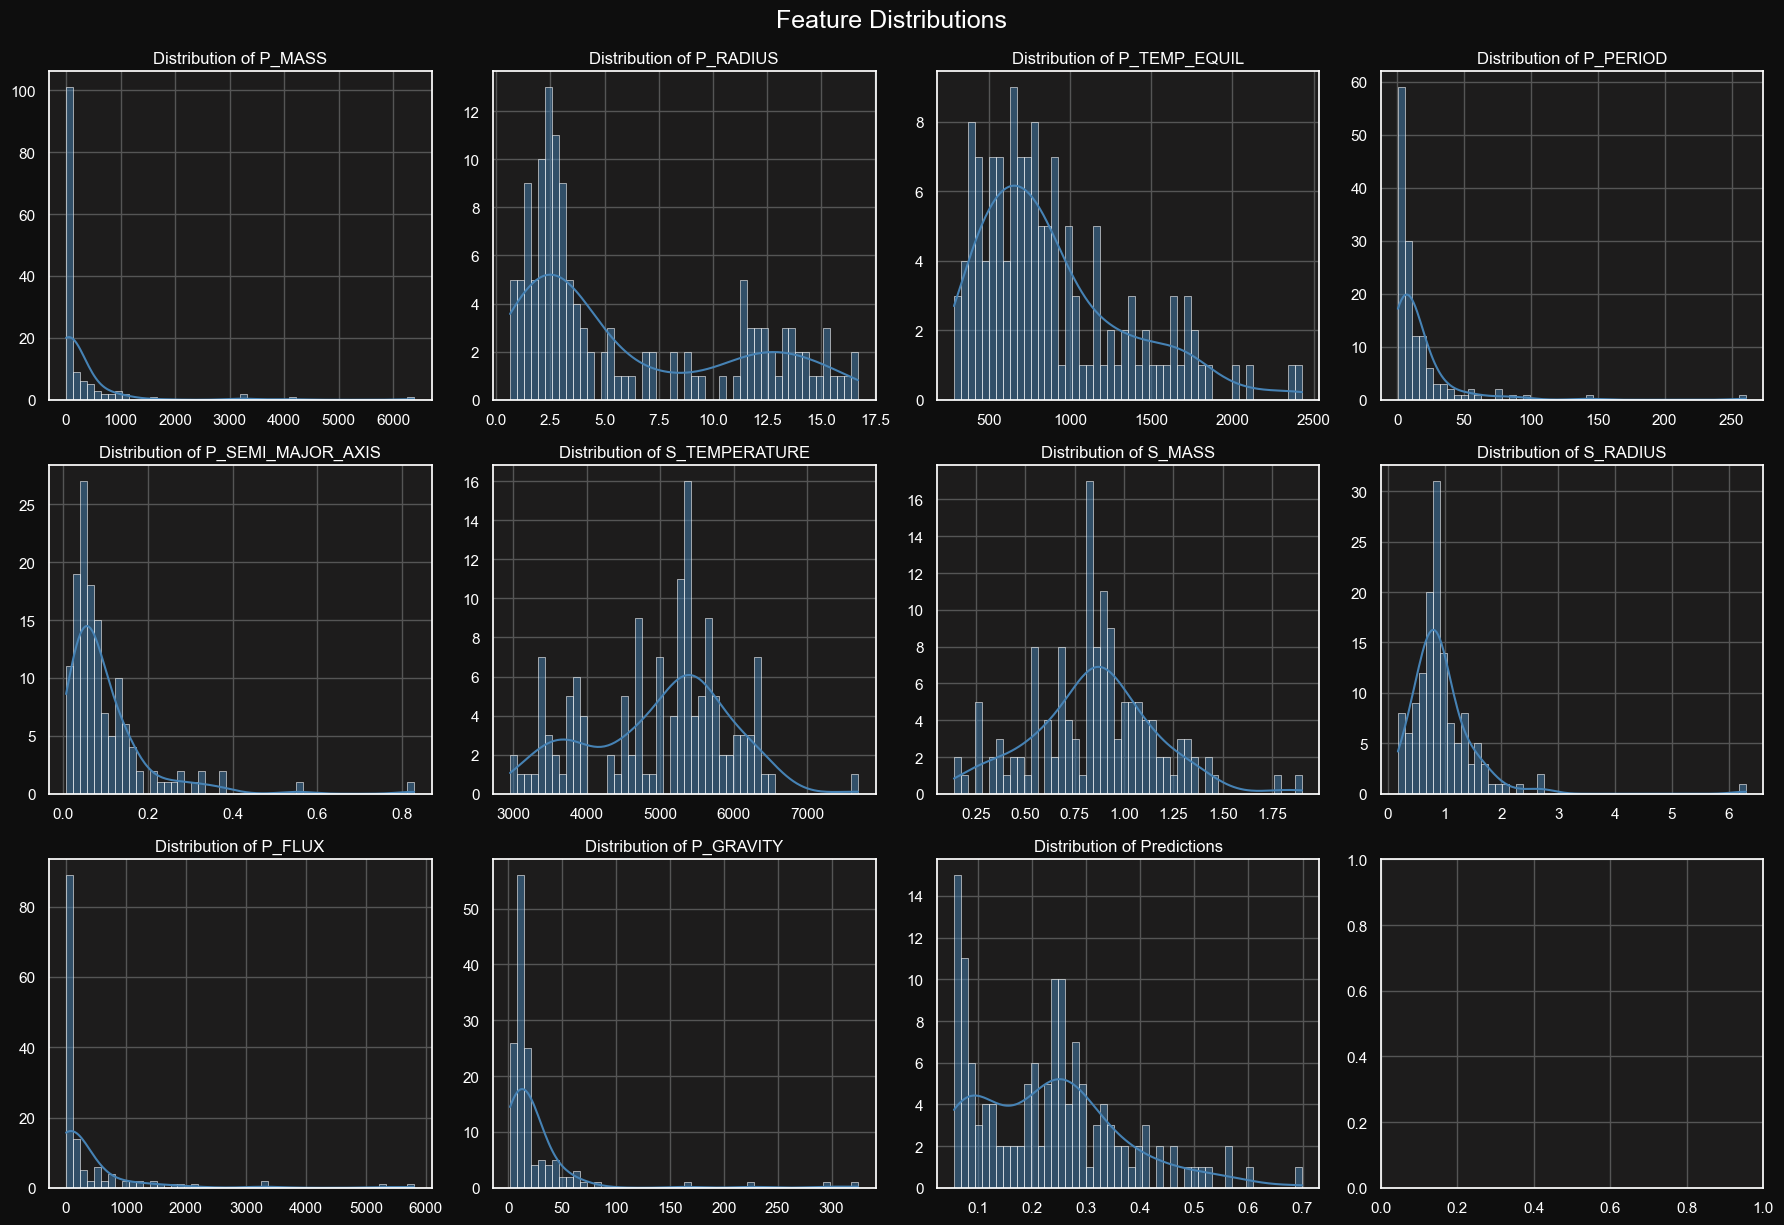

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=50, color='steelblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=18, y=1.02)
plt.show()


### Boxplots for outlier detection

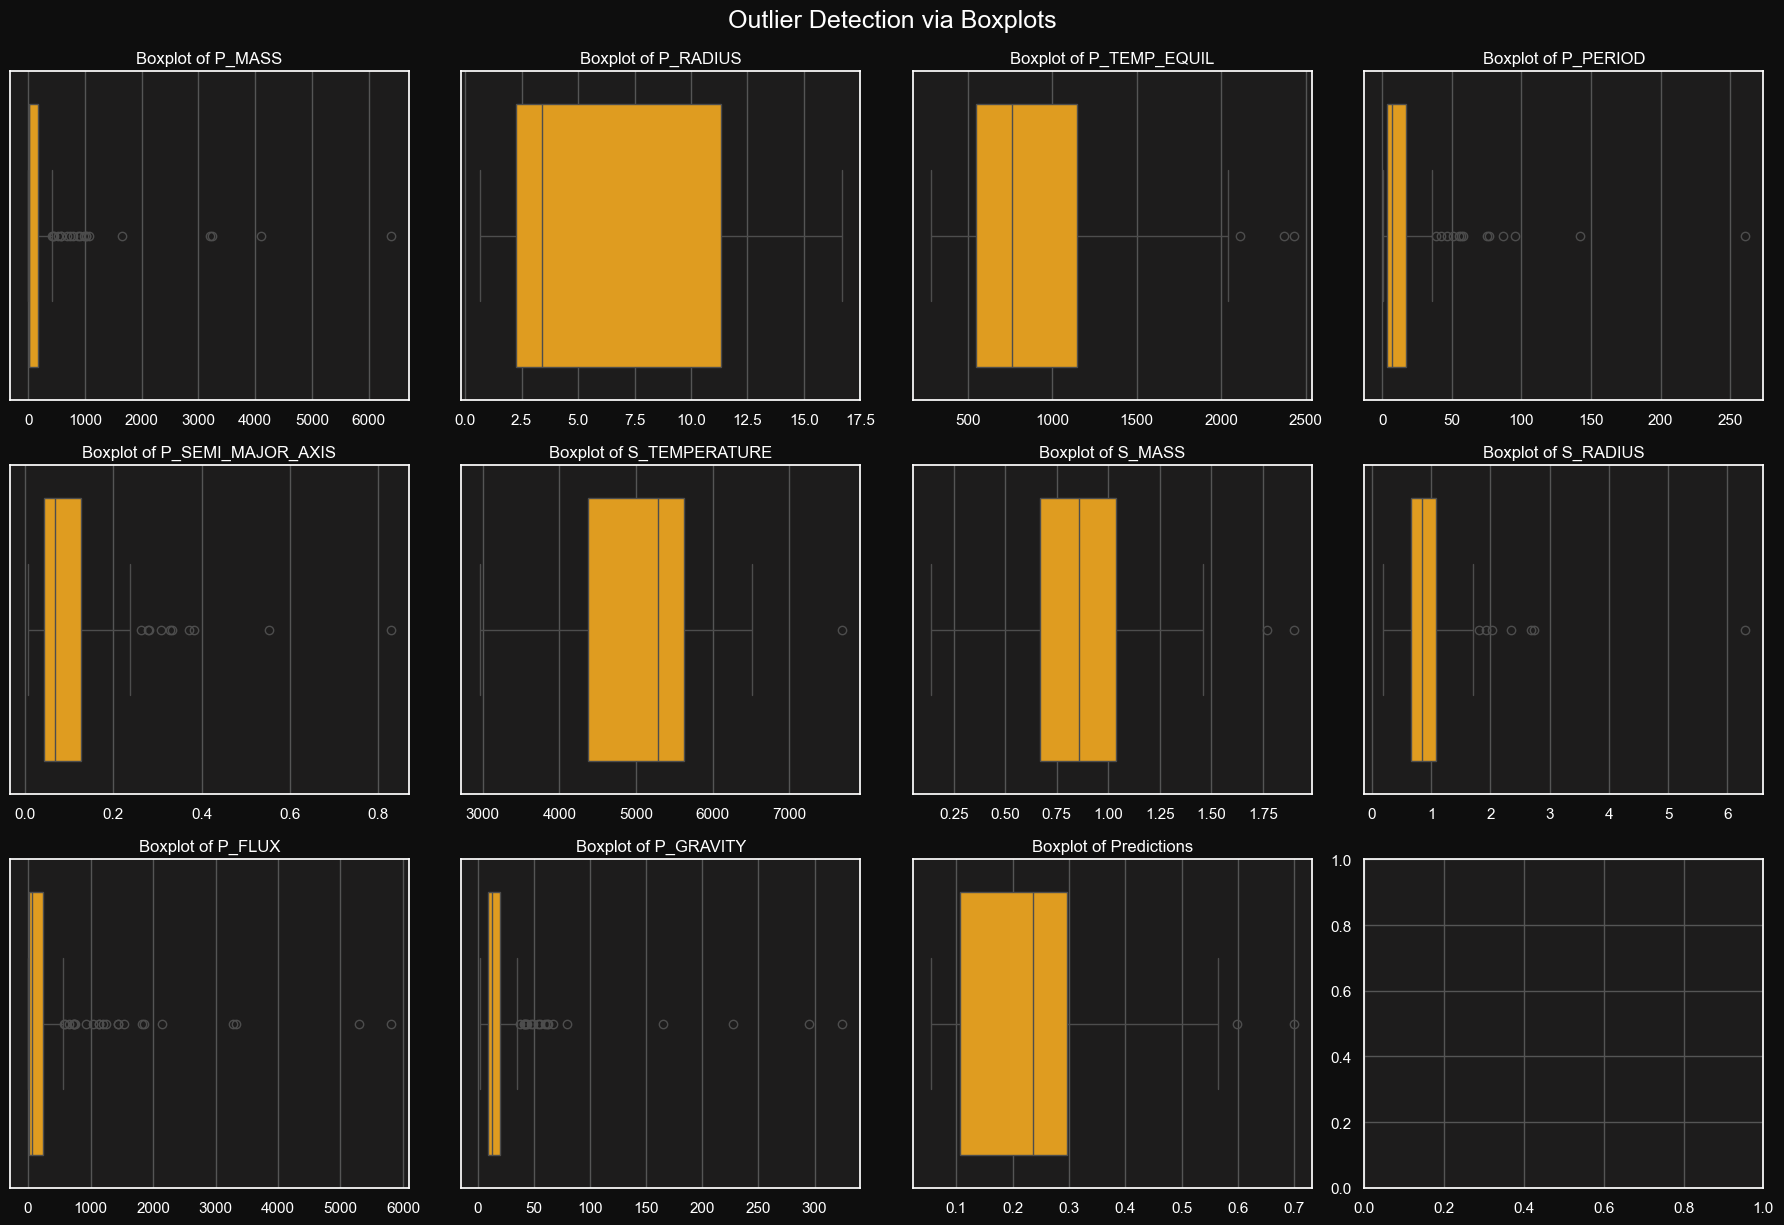

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.suptitle("Outlier Detection via Boxplots", fontsize=18, y=1.02)
plt.show()

### Correlation Heatmap

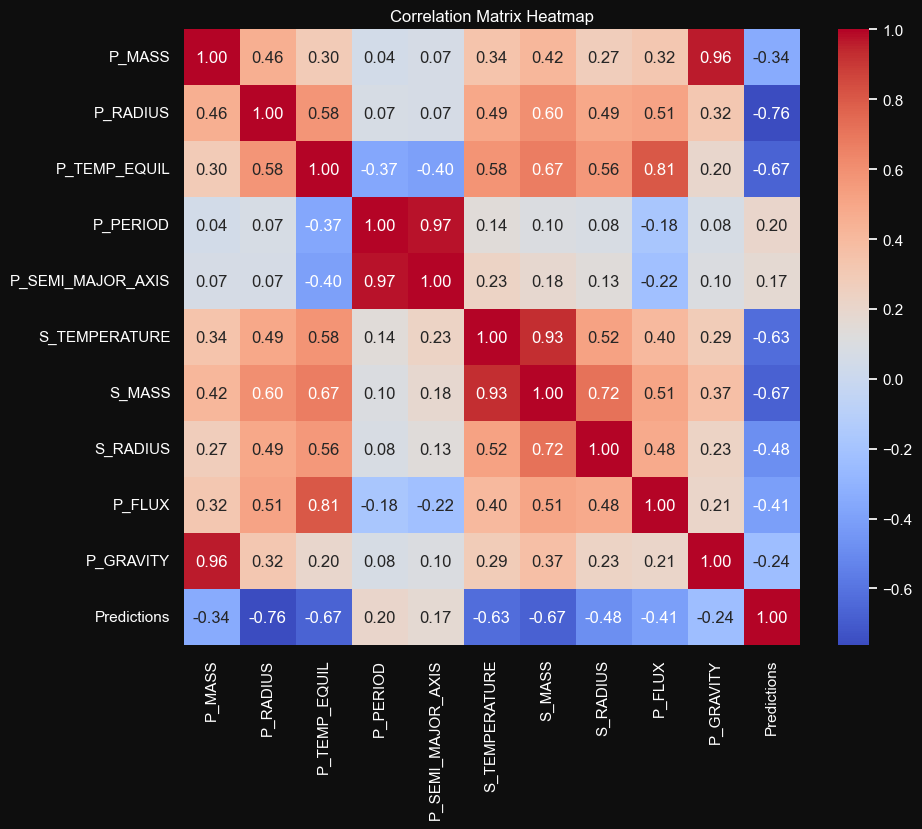

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Scatter Plot against ESI

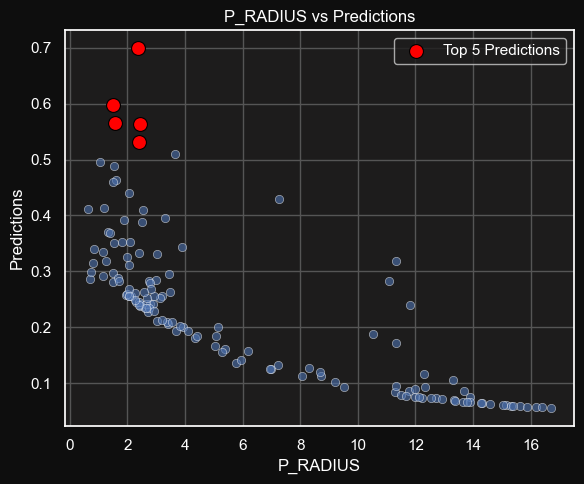

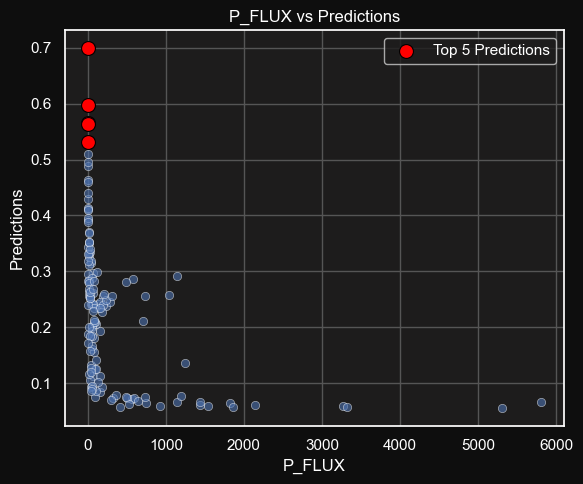

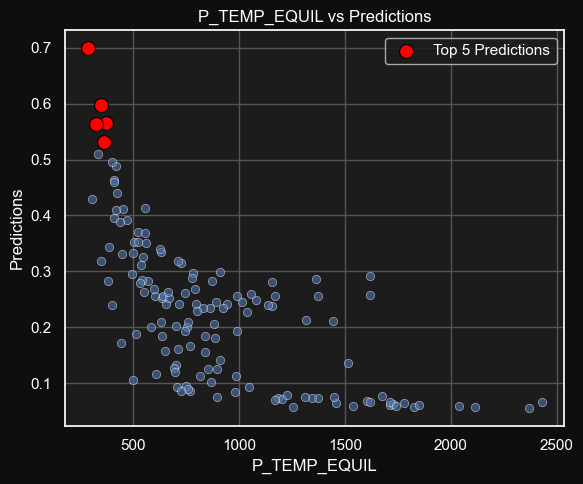

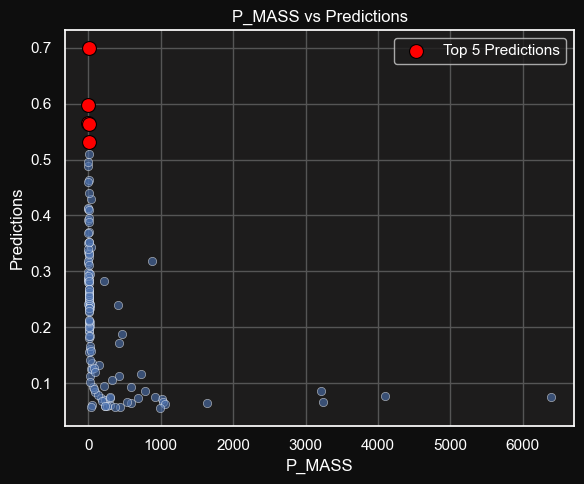

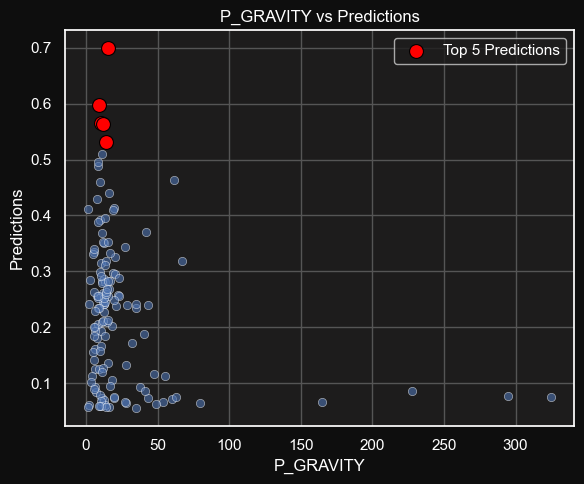

In [66]:
for feature in features:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x=feature, y='Predictions', alpha=0.6)
    top_5 = df.nlargest(5, 'Predictions')
    sns.scatterplot(data=top_5, x=feature, y='Predictions', color='red', s=100, label='Top 5 Predictions', edgecolor='black')
    plt.legend()
    plt.title(f'{feature} vs Predictions')
    plt.xlabel(feature)
    plt.ylabel('Predictions')
    plt.tight_layout()
    plt.show()
